# **Klasifikasi Kebiasaan Belajar dan Faktor Pendukung Prestasi Siswa Menggunakan Machine Learning**



# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
drive.mount('/content/drive')

# Load the dataset with clustering results (Original data with clusters)
file_path = '/content/drive/MyDrive/Data/Student_Performance_Factors_with_Cluster_Labels_Scaled.csv'
df = pd.read_csv(file_path)

# Menangani data yang hilang
missing_values = df.isnull().sum()
print("Missing values before dropping rows:\n", missing_values[missing_values > 0])

# Drop rows with any missing values
df.dropna(inplace=True)

# Verify if missing values have been removed
missing_values_after_drop = df.isnull().sum()
print("\nMissing values after dropping rows:\n", missing_values_after_drop[missing_values_after_drop > 0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing values before dropping rows:
 Cluster Label    1570
dtype: int64

Missing values after dropping rows:
 Series([], dtype: int64)


In [ ]:
print(df['Cluster'].value_counts())

Cluster
2    1685
3    1198
0    1121
1     804
Name: count, dtype: int64


In [ ]:
# Display the number of rows
num_rows = df.shape[0]
print(f"\nNumber of rows after dropping missing values: {num_rows}")

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
display(df.head())


Number of rows after dropping missing values: 4808

First few rows of the DataFrame:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster,Cluster Label
0,23,84,1,0,0,7,73,1,1,0,...,1,2,3,0,1,2,1,67,0,Siswa dengan Keseimbangan Belajar dan Dukungan...
1,19,64,1,2,0,8,59,1,1,2,...,1,0,4,0,0,1,0,61,1,Siswa Berprestasi di Tengah Keterbatasan Ekonomi
2,24,98,2,2,1,7,91,2,1,2,...,1,1,4,0,2,2,1,74,2,Siswa dengan Fokus Akademik dan Dukungan Kelua...
3,29,89,1,2,1,8,98,2,1,1,...,1,0,4,0,1,1,1,71,2,Siswa dengan Fokus Akademik dan Dukungan Kelua...
4,19,92,2,2,1,6,65,2,1,3,...,1,1,4,0,0,2,0,70,3,Siswa Konsisten dengan Dukungan Keluarga dan L...


In [ ]:
df.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
count,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.0,4808.000000,...,4808.000000,4808.000000,4808.000000,4808.000000,4808.0,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000
mean,20.100042,80.062604,1.228785,1.206947,0.599626,7.041805,75.073419,1.310524,1.0,1.289101,...,1.297213,0.698835,1.191972,2.959859,0.0,0.902454,1.496048,0.583611,67.207363,1.615641
std,5.726498,11.470824,0.867356,0.869841,0.490025,1.471354,14.376039,0.786482,0.0,0.973344,...,0.900533,0.458812,0.755510,1.019189,0.0,0.704122,0.669388,0.493011,3.168595,1.096138
min,5.000000,60.000000,0.000000,0.000000,0.000000,4.000000,50.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,60.000000,0.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,6.000000,63.000000,1.000000,1.0,1.000000,...,0.000000,0.000000,1.000000,2.000000,0.0,0.000000,1.000000,0.000000,65.000000,1.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.000000,75.000000,2.000000,1.0,1.000000,...,2.000000,1.000000,1.000000,3.000000,0.0,1.000000,2.000000,1.000000,67.000000,2.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.000000,87.000000,2.000000,1.0,2.000000,...,2.000000,1.000000,2.000000,4.000000,0.0,1.000000,2.000000,1.000000,69.000000,2.000000
max,36.000000,100.000000,2.000000,2.000000,1.000000,10.000000,100.000000,2.000000,1.0,3.000000,...,2.000000,1.000000,2.000000,6.000000,0.0,2.000000,2.000000,1.000000,75.000000,3.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Cluster', 'Cluster Label'])  # Features excluding cluster columns
y = df['Cluster']  # The target is the 'Cluster' label (target variable)

# Terapkan Undersampling agar data seimbang
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Introduce more noise to avoid overfitting (setalah pengecekkan tanpa ini data mengalami overfitting)
X_resampled += np.random.normal(0, 0.2, X_resampled.shape)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.


Training KNN...

KNN Accuracy: 0.3199
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.32      0.33       192
           1       0.28      0.34      0.31       149
           2       0.35      0.35      0.35       148
           3       0.33      0.26      0.29       155

    accuracy                           0.32       644
   macro avg       0.32      0.32      0.32       644
weighted avg       0.32      0.32      0.32       644

KNN F1-Score: 0.3197
KNN Precision: 0.3229
KNN Recall: 0.3199


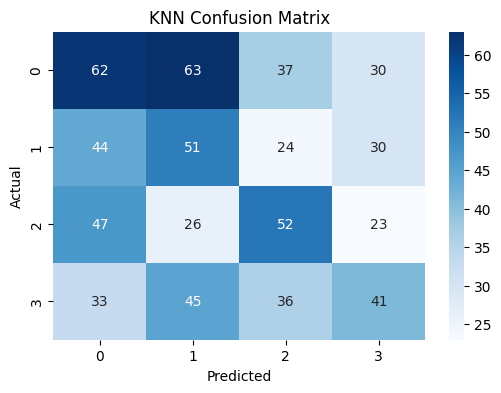

-------------------------------------------------------------------

Training Random Forest...

Random Forest Accuracy: 0.9876
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       192
           1       0.99      0.98      0.98       149
           2       0.99      0.99      0.99       148
           3       0.99      0.99      0.99       155

    accuracy                           0.99       644
   macro avg       0.99      0.99      0.99       644
weighted avg       0.99      0.99      0.99       644

Random Forest F1-Score: 0.9876
Random Forest Precision: 0.9876
Random Forest Recall: 0.9876


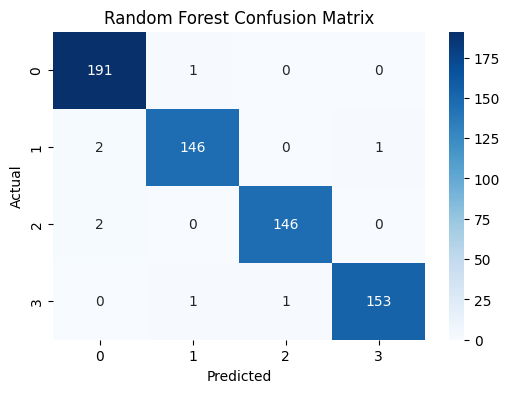

-------------------------------------------------------------------

Training Decision Tree...

Decision Tree Accuracy: 0.9783
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       192
           1       0.96      0.99      0.98       149
           2       0.98      0.97      0.98       148
           3       0.99      0.98      0.98       155

    accuracy                           0.98       644
   macro avg       0.98      0.98      0.98       644
weighted avg       0.98      0.98      0.98       644

Decision Tree F1-Score: 0.9783
Decision Tree Precision: 0.9784
Decision Tree Recall: 0.9783


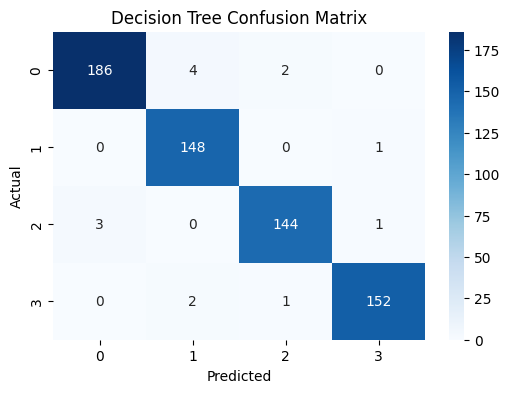

-------------------------------------------------------------------

Training SVM...

SVM Accuracy: 0.2500
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       192
           1       0.25      0.56      0.35       149
           2       0.25      0.52      0.33       148
           3       1.00      0.00      0.00       155

    accuracy                           0.25       644
   macro avg       0.62      0.27      0.17       644
weighted avg       0.65      0.25      0.16       644

SVM F1-Score: 0.1577
SVM Precision: 0.6541
SVM Recall: 0.2500


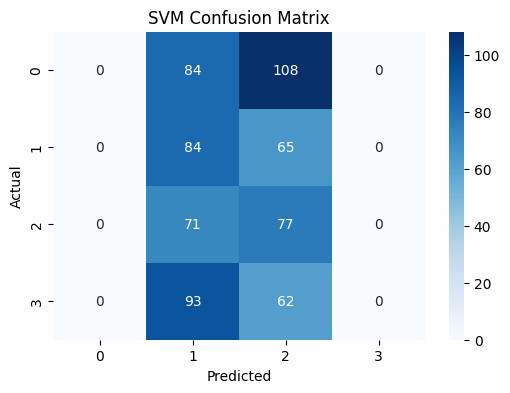

-------------------------------------------------------------------


,Model,Accuracy,F1-Score,Precision,Recall
0,KNN,0.319876,0.319670,0.322945,0.319876
1,Random Forest,0.987578,0.987579,0.987632,0.987578
2,Decision Tree,0.978261,0.978265,0.978438,0.978261
3,SVM,0.250000,0.157748,0.654075,0.250000


In [ ]:
# Define Models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and Evaluate Models
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Predict and Evaluate
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate Precision and Recall
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)


    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n{report}")
    print(f"{name} F1-Score: {f1:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")

    # Store Results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall
    })

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    print("-------------------------------------------------------------------")


# Tampilkan hasil
results_df = pd.DataFrame(results)
results_df

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Summary of Results
results_df = pd.DataFrame(results)
print("\nRingkasan Performen setiap Model:")
results_df


Ringkasan Performen setiap Model:


,Model,Accuracy,F1-Score,Precision,Recall
0,KNN,0.319876,0.319670,0.322945,0.319876
1,Random Forest,0.987578,0.987579,0.987632,0.987578
2,Decision Tree,0.978261,0.978265,0.978438,0.978261
3,SVM,0.250000,0.157748,0.654075,0.250000


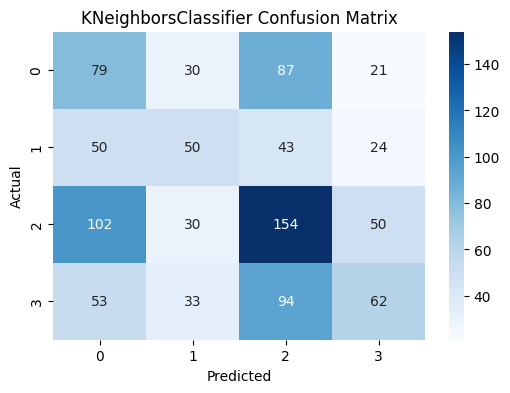

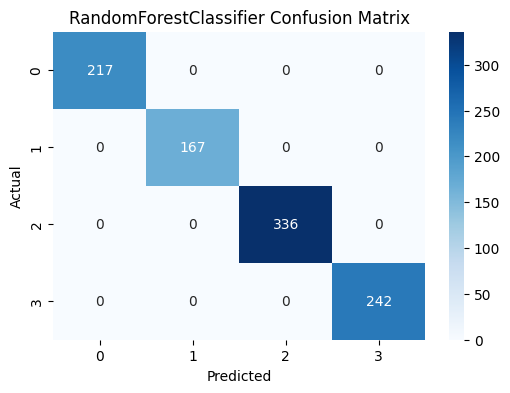

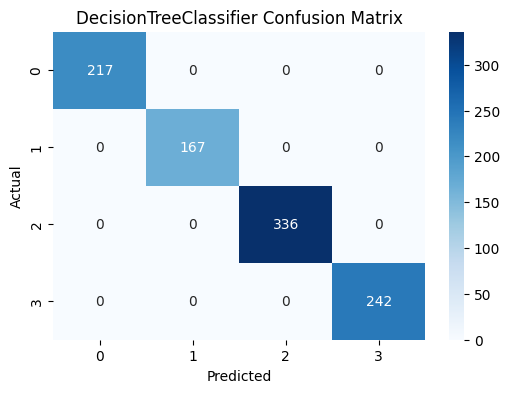

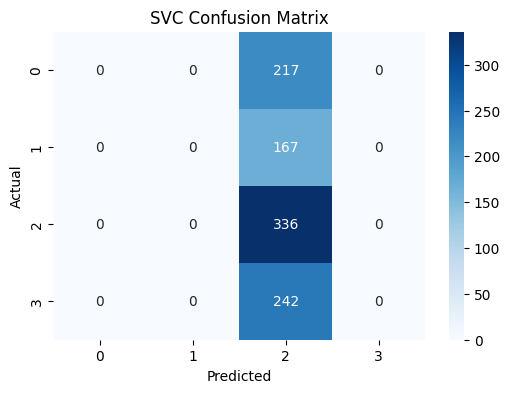

,Model,Training Accuracy,Testing Accuracy,Difference in Accuracy,Overfitting,Confusion Matrix
0,KNeighborsClassifier,0.589704,0.358628,0.231076,Possible (Difference exceeds threshold: 0.1000),"[[79, 30, 87, 21], [50, 50, 43, 24], [102, 30,..."
1,RandomForestClassifier,1.000000,1.000000,0.000000,Potential Overfit (Perfect Scores),"[[217, 0, 0, 0], [0, 167, 0, 0], [0, 0, 336, 0..."
2,DecisionTreeClassifier,1.000000,1.000000,0.000000,Potential Overfit (Perfect Scores),"[[217, 0, 0, 0], [0, 167, 0, 0], [0, 0, 336, 0..."
3,SVC,0.350754,0.349272,0.001482,No significant,"[[0, 0, 217, 0], [0, 0, 167, 0], [0, 0, 336, 0..."


In [ ]:
# Define Models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Cek overfitting dengan membandingkan akurasi train dan test
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    diff_accuracy = train_acc - test_acc

    #Simple overfitting check (with threshold)
    threshold = 0.1  # Adjust as needed
    overfitting = f"Possible (Difference exceeds threshold: {threshold:.4f})" if diff_accuracy > threshold else "No significant"

    # Check for perfect scores and add an indicator
    if train_acc == 1.0 and test_acc == 1.0:
        overfitting = "Potential Overfit (Perfect Scores)"

    # Generate and store the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    return {
        'Model': type(model).__name__,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc,
        'Difference in Accuracy': diff_accuracy,
        'Overfitting': overfitting,
        'Confusion Matrix': cm
    }

# Train and Evaluate Models
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models, store results in a list
results = []
for name, model in models.items():
    results.append(evaluate_model(model, X_train, X_test, y_train, y_test))

# Create a Pandas DataFrame from the results
results_df_overfitt = pd.DataFrame(results)

# Display confusion matrices
for result in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{result['Model']} Confusion Matrix")
    plt.show()

# Display the results table
results_df_overfitt

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Train KNN model
param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform'],
    'p': [2]  # Use Euclidean distance
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Predict and evaluate
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Cetak parameter terbaik
print("Parameter Terbaik:", grid_search_knn.best_params_)

# Cetak model KNN terbaik
print("\nModel KNN Terbaik:", grid_search_knn.best_estimator_)

Parameter Terbaik: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

Model KNN Terbaik: KNeighborsClassifier(n_neighbors=11)


In [ ]:
# Train Random Forest model
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2']
}

from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Predict and evaluate
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Cetak parameter terbaik
print("Parameter Terbaik:", grid_search_rf.best_params_)

# Cetak model RF terbaik
print("\nModel RF Terbaik:", grid_search_rf.best_estimator_)

Parameter Terbaik: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}

Model RF Terbaik: RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50, random_state=42)


In [ ]:
# Train Decision Tree model
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

# Predict and evaluate
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Cetak parameter terbaik
print("Parameter Terbaik:", grid_search_dt.best_params_)

# Cetak model DT terbaik
print("\nModel DT Terbaik:", grid_search_dt.best_estimator_)

Parameter Terbaik: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model DT Terbaik: DecisionTreeClassifier(max_depth=3, random_state=42)


In [ ]:
# Train SVM model
param_grid_svc = {
    'C': [0.01, 0.1, 1],  # Lower C values to reduce complexity
    'kernel': ['linear'],  # Use linear kernel to avoid overfitting
    'gamma': ['scale']  # Default gamma
}

grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)

# Predict and evaluate
best_svc_model = grid_search_svc.best_estimator_
y_pred_svc = best_svc_model.predict(X_test_scaled)

# Cetak parameter terbaik
print("Parameter Terbaik:", grid_search_svc.best_params_)

# Cetak model SVC terbaik
print("\nModel SVC Terbaik:", grid_search_svc.best_estimator_)

Parameter Terbaik: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

Model SVC Terbaik: SVC(C=0.01, kernel='linear', random_state=42)


Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Ensure X_test_scaled and y_test are derived from the same split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) #your original split

#Normalize data (if you are using scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Predict and evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy after tunning: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy after tunning: 0.8773291925465838
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       192
           1       0.98      0.77      0.86       149
           2       0.78      0.99      0.87       148
           3       0.89      0.86      0.88       155

    accuracy                           0.88       644
   macro avg       0.89      0.88      0.88       644
weighted avg       0.89      0.88      0.88       644



In [ ]:
# Predict and evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy after tunning: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy after tunning: 0.9736024844720497
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       192
           1       0.99      0.94      0.97       149
           2       0.97      0.99      0.98       148
           3       0.96      0.99      0.98       155

    accuracy                           0.97       644
   macro avg       0.97      0.97      0.97       644
weighted avg       0.97      0.97      0.97       644



In [ ]:
# Predict and evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy after tunning: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy after tunning: 0.9736024844720497
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       192
           1       0.99      0.94      0.97       149
           2       0.97      0.99      0.98       148
           3       0.96      0.99      0.98       155

    accuracy                           0.97       644
   macro avg       0.97      0.97      0.97       644
weighted avg       0.97      0.97      0.97       644



In [ ]:
# Predict and evaluate SVM
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy after tunning: {accuracy_svc}")
print(classification_report(y_test, y_pred_svc))

SVC Accuracy after tunning: 0.9736024844720497
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       192
           1       0.99      0.94      0.97       149
           2       0.97      0.99      0.98       148
           3       0.96      0.99      0.98       155

    accuracy                           0.97       644
   macro avg       0.97      0.97      0.97       644
weighted avg       0.97      0.97      0.97       644



In [ ]:
# Create a list to store the results of the tuned models
tuned_results = []

# Append the results for each tuned model
tuned_results.append({
    'Model': 'KNN',
    'Accuracy': accuracy_knn,
    'F1-Score': f1_score(y_test, y_pred_knn, average='weighted'),
    'Precision': precision_score(y_test, y_pred_knn, average='weighted'),
    'Recall': recall_score(y_test, y_pred_knn, average='weighted')
})

tuned_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'F1-Score': f1_score(y_test, y_pred_rf, average='weighted'),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted')
})

tuned_results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'F1-Score': f1_score(y_test, y_pred_dt, average='weighted'),
    'Precision': precision_score(y_test, y_pred_dt, average='weighted'),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted')
})

tuned_results.append({
    'Model': 'SVM',
    'Accuracy': accuracy_svc,
    'F1-Score': f1_score(y_test, y_pred_svc, average='weighted'),
    'Precision': precision_score(y_test, y_pred_svc, average='weighted'),
    'Recall': recall_score(y_test, y_pred_svc, average='weighted')
})

# Create a DataFrame from the tuned_results list
tuned_results_df = pd.DataFrame(tuned_results)

# Display the DataFrame
print("\nTabel Perbandingan Model Setelah Tuning:")
tuned_results_df


Tabel Perbandingan Model Setelah Tuning:


,Model,Accuracy,F1-Score,Precision,Recall
0,KNN,0.877329,0.877195,0.889159,0.877329
1,Random Forest,0.973602,0.973529,0.973960,0.973602
2,Decision Tree,0.973602,0.973529,0.973960,0.973602
3,SVM,0.973602,0.973529,0.973960,0.973602


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [ ]:
# Concatenate the two DataFrames for easy comparison
comparison_df = pd.concat([results_df, tuned_results_df], keys=['Before Tuning', 'After Tuning'])

# Reset the index to make it easier to work with
comparison_df = comparison_df.reset_index()

# Rename columns for clarity
comparison_df.columns = ['Evaluation Stage', 'level_', 'Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall']

# Display the comparison table
print("\nTabel Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning:")
comparison_df


Tabel Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning:


,Evaluation Stage,level_,Model,Accuracy,F1-Score,Precision,Recall
0,Before Tuning,0,KNN,0.319876,0.319670,0.322945,0.319876
1,Before Tuning,1,Random Forest,0.987578,0.987579,0.987632,0.987578
2,Before Tuning,2,Decision Tree,0.978261,0.978265,0.978438,0.978261
3,Before Tuning,3,SVM,0.250000,0.157748,0.654075,0.250000
4,After Tuning,0,KNN,0.877329,0.877195,0.889159,0.877329
5,After Tuning,1,Random Forest,0.973602,0.973529,0.973960,0.973602
6,After Tuning,2,Decision Tree,0.973602,0.973529,0.973960,0.973602
7,After Tuning,3,SVM,0.973602,0.973529,0.973960,0.973602


In [ ]:
def check_overfitting(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    diff_accuracy = train_accuracy - test_accuracy
    threshold = 0.1

    print(f"Model: {type(model).__name__}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Difference in Accuracy: {diff_accuracy:.4f}")

    if diff_accuracy > threshold:
        print(f"Possible overfitting detected! (Difference exceeds threshold: {threshold:.4f})")
    else:
        print("No significant overfitting detected.")
    print("----------------------------------------------------------")
    return train_accuracy, test_accuracy, diff_accuracy


#After each model training and tuning, call check_overfitting:

#Example for SVC
train_acc_svc, test_acc_svc, diff_svc = check_overfitting(best_svc_model, X_train_scaled, X_test_scaled, y_train, y_test)

#Example for KNN
train_acc_knn, test_acc_knn, diff_knn = check_overfitting(best_knn_model, X_train_scaled, X_test_scaled, y_train, y_test)

#Example for RandomForest
train_acc_rf, test_acc_rf, diff_rf = check_overfitting(best_rf_model, X_train_scaled, X_test_scaled, y_train, y_test)

#Example for Decision Tree
train_acc_dt, test_acc_dt, diff_dt = check_overfitting(best_dt_model, X_train_scaled, X_test_scaled, y_train, y_test)

Model: SVC
Train Accuracy: 0.9747
Test Accuracy: 0.9736
Difference in Accuracy: 0.0011
No significant overfitting detected.
----------------------------------------------------------
Model: KNeighborsClassifier
Train Accuracy: 0.9044
Test Accuracy: 0.8773
Difference in Accuracy: 0.0270
No significant overfitting detected.
----------------------------------------------------------
Model: RandomForestClassifier
Train Accuracy: 0.9747
Test Accuracy: 0.9736
Difference in Accuracy: 0.0011
No significant overfitting detected.
----------------------------------------------------------
Model: DecisionTreeClassifier
Train Accuracy: 0.9747
Test Accuracy: 0.9736
Difference in Accuracy: 0.0011
No significant overfitting detected.
----------------------------------------------------------


In [ ]:
# Calculate and print F1-score for each model before tuning
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} F1-score (before tuning): {f1}")



# Calculate and print F1-score for each tuned model
print("\nF1-scores after tuning:")
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"KNN F1-score: {f1_knn}")

f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1-score: {f1_rf}")

f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree F1-score: {f1_dt}")

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
print(f"SVC F1-score: {f1_svc}")

KNN F1-score (before tuning): 0.5093280293425718
Random Forest F1-score (before tuning): 0.9891310925149158
Decision Tree F1-score (before tuning): 0.9891310925149158
SVM F1-score (before tuning): 0.08588995545517285

F1-scores after tuning:
KNN F1-score: 0.8771954909104008
Random Forest F1-score: 0.9735291018290821
Decision Tree F1-score: 0.9735291018290821
SVC F1-score: 0.9735291018290821


In [ ]:
# Calculate F1-score for the training set
y_train_pred_knn = best_knn_model.predict(X_train_scaled)
train_f1_knn = f1_score(y_train, y_train_pred_knn, average='weighted')
print(f"KNN Train F1-Score: {train_f1_knn:.4f}")

y_train_pred_rf = best_rf_model.predict(X_train_scaled)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
print(f"Random Forest Train F1-Score: {train_f1_rf:.4f}")

y_train_pred_dt = best_dt_model.predict(X_train_scaled)
train_f1_dt = f1_score(y_train, y_train_pred_dt, average='weighted')
print(f"Decision Tree Train F1-Score: {train_f1_dt:.4f}")

y_train_pred_svc = best_svc_model.predict(X_train_scaled)
train_f1_svc = f1_score(y_train, y_train_pred_svc, average='weighted')
print(f"SVM Train F1-Score: {train_f1_svc:.4f}")

#The test F1-scores were already calculated and printed in the previous code block.

KNN Train F1-Score: 0.9038
Random Forest Train F1-Score: 0.9747
Decision Tree Train F1-Score: 0.9747
SVM Train F1-Score: 0.9747


**Identifikasi Kelemahan Model dan Analisis**

### 1. **KNN (K-Nearest Neighbors)**  
   - **Kelebihan**:  
     - Setelah tuning, terjadi peningkatan signifikan pada semua metrik evaluasi (**Accuracy: 87.73%**, **F1-Score: 87.72%**).  
     - Model sederhana dan efektif untuk dataset kecil atau menengah.  
   - **Kelemahan**:  
     - Sebelum tuning, performa sangat buruk (**Accuracy: 31.99%**), menunjukkan sensitivitas terhadap pemilihan parameter (jumlah tetangga, k).  
     - Performa dapat menurun pada dataset dengan dimensi tinggi atau distribusi data yang tidak seragam.  
   - **Tindakan Lanjutan**:  
     - Gunakan teknik validasi silang untuk memilih parameter k secara optimal.  
     - Coba metode jarak lain, seperti Manhattan Distance, untuk memperbaiki performa pada dataset tertentu.  

### 2. **Random Forest**  
   - **Kelebihan**:  
     - Performanya tinggi bahkan sebelum tuning (**Accuracy: 98.76%**) dan stabil setelah tuning (**Accuracy: 97.36%**).  
     - Tidak ada tanda-tanda overfitting, karena performa antara data latih dan uji hampir sama.  
   - **Kelemahan**:  
     - Memerlukan lebih banyak sumber daya komputasi dibanding model yang lebih sederhana.  
     - Performanya sedikit menurun setelah tuning, mungkin karena parameter tuning tidak optimal.  
   - **Tindakan Lanjutan**:  
     - Lakukan analisis fitur untuk mengidentifikasi pentingnya fitur dan mengurangi kompleksitas model.  
     - Gunakan teknik tuning yang lebih ekstensif, seperti Random Search atau Bayesian Optimization.  

### 3. **Decision Tree**  
   - **Kelebihan**:  
     - Performa tinggi baik sebelum tuning (**Accuracy: 97.83%**) maupun setelah tuning (**Accuracy: 97.36%**).  
     - Mudah diinterpretasikan dan tidak membutuhkan banyak preprocessing data.  
   - **Kelemahan**:  
     - Rentan terhadap overfitting, terutama pada dataset dengan banyak fitur.  
     - Performa serupa dengan Random Forest tetapi tanpa stabilitas yang sama.  
   - **Tindakan Lanjutan**:  
     - Gunakan pruning atau tetapkan kedalaman maksimum untuk mengurangi kompleksitas.  
     - Bandingkan dengan model ensemble seperti Random Forest untuk melihat apakah model tunggal cukup efektif.  

### 4. **SVM (Support Vector Machine)**  
   - **Kelebihan**:  
     - Setelah tuning, performa meningkat signifikan dari **Accuracy 25%** menjadi **97.36%**, dengan metrik evaluasi yang seimbang.  
     - Cocok untuk dataset dengan dimensi tinggi.  
   - **Kelemahan**:  
     - Sebelum tuning, performa sangat buruk karena sensitivitas terhadap parameter seperti kernel dan regularisasi.  
     - Membutuhkan tuning parameter yang hati-hati untuk mencapai performa optimal.  
   - **Tindakan Lanjutan**:  
     - Gunakan Grid Search atau Bayesian Optimization untuk memilih kernel dan parameter regularisasi terbaik.  
     - Lakukan scaling atau normalisasi pada fitur untuk hasil yang lebih konsisten.  

---

### **Rekomendasi Umum untuk Semua Model**

1. **Tuning Parameter Lebih Lanjut**  
   - Untuk semua model, gunakan teknik tuning hyperparameter yang lebih komprehensif (seperti Random Search atau Bayesian Optimization).  

2. **Deteksi dan Pencegahan Overfitting**  
   - Meskipun tidak ada tanda-tanda overfitting signifikan, penting untuk menguji model pada data baru yang belum pernah terlihat (out-of-sample data).  

3. **Evaluasi Berdasarkan Tujuan**  
   - Pilih model sesuai kebutuhan:
     - Jika memprioritaskan akurasi tinggi, gunakan Random Forest atau SVM.  
     - Jika interpretabilitas lebih penting, pilih Decision Tree.  

4. **Analisis Fitur**  
   - Gunakan teknik analisis fitur (seperti SHAP atau feature importance) untuk memastikan kontribusi fitur relevan terhadap hasil prediksi.  

5. **Kumpulkan Data Tambahan**  
   - Jika ada ketidakseimbangan data, pertimbangkan teknik oversampling atau kumpulkan data tambahan untuk meningkatkan performa model seperti KNN.  

6. **Validasi dengan Data Tambahan**  
   - Validasi semua model dengan dataset baru untuk memastikan generalisasi yang baik.  

7. **Gunakan Metrik Tambahan**  
   - Evaluasi model dengan metrik seperti ROC-AUC atau log loss untuk mendapatkan wawasan lebih dalam.